In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install --upgrade diffusers[torch]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.1 MB/s eta 0:00:00


In [3]:
from diffusers import StableDiffusionPipeline
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2024-05-24 02:08:39.010617: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-24 02:08:39.010709: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-24 02:08:39.128390: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [5]:
#from PIL import Image

In [6]:
prompt = "a photo of a black tri color australian shepherd running through the woods in the northern united states"
images = []
for i in range(3):
    images.append({"name": f"dog_running_{i}", "prompt": prompt })

dog_running_0
a photo of a black tri color australian shepherd running through the woods in the northern united states


  0%|          | 0/50 [00:00<?, ?it/s]

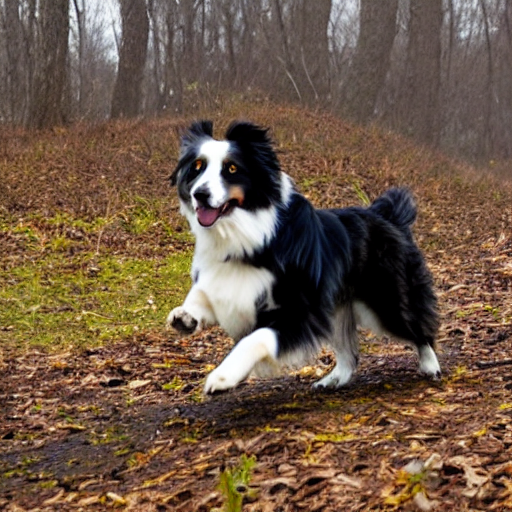



dog_running_1
a photo of a black tri color australian shepherd running through the woods in the northern united states


  0%|          | 0/50 [00:00<?, ?it/s]

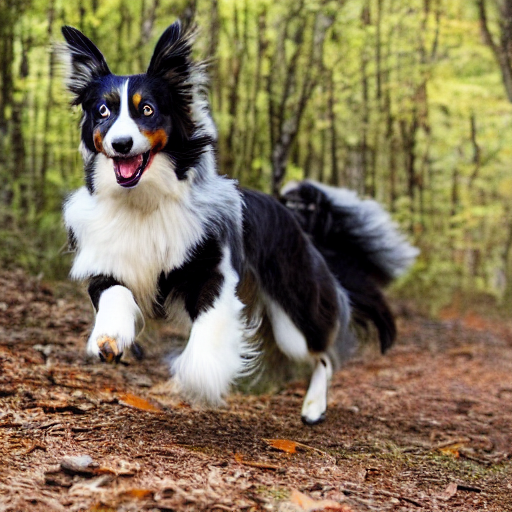



dog_running_2
a photo of a black tri color australian shepherd running through the woods in the northern united states


  0%|          | 0/50 [00:00<?, ?it/s]

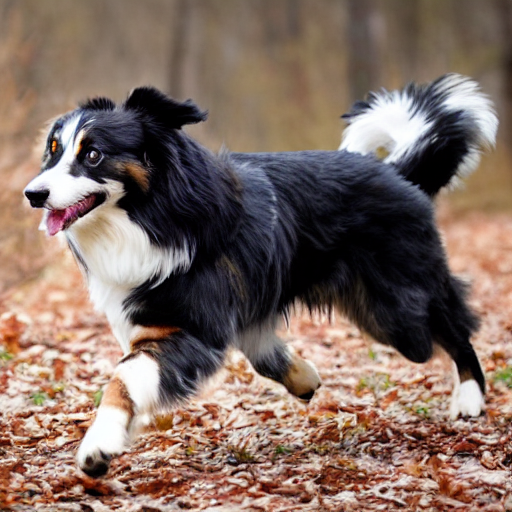

In [7]:
for idx,img in enumerate(images):
    print(img["name"])
    print(img["prompt"])
    image = pipe(img["prompt"]).images[0]
    display(image)
    img["image_pil"] = image
    print("\n")

In [8]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

def get_cv2_image(pil_image):
    image = cv.cvtColor(np.array(pil_image), cv.COLOR_RGB2BGR)
    return image

In [9]:
for image in images:
    image["image_cv2"] = get_cv2_image(image["image_pil"])

In [10]:
def create_histogram(image):
    plt.title(f"{image['name']}")
    prob, _, _ = plt.hist(image["image_cv2"].ravel(), bins=32)
    image["prob_dist"] = prob
    plt.show()

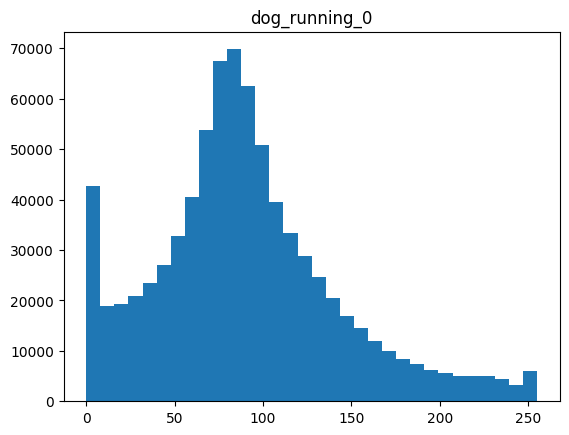

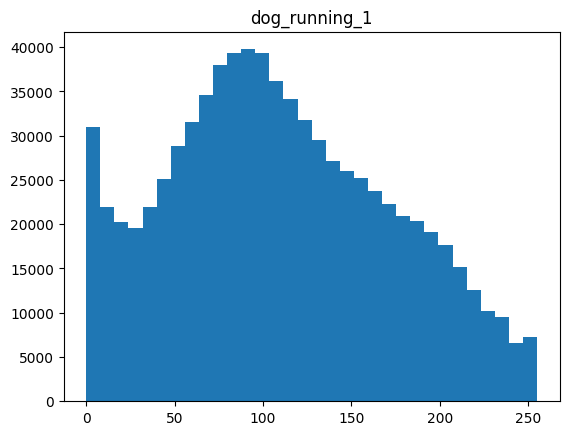

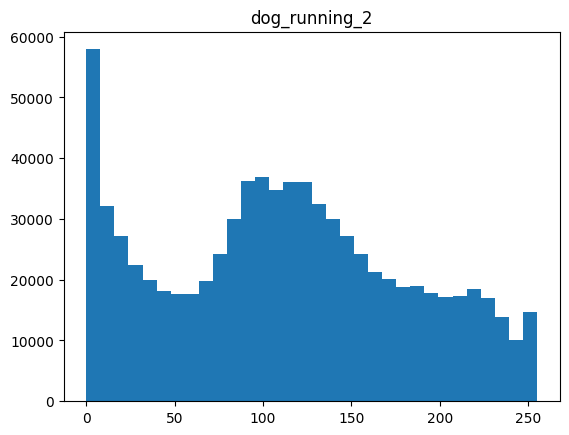

In [11]:
for image in images:
    create_histogram(image)

In [12]:
from scipy.stats import kstest
import seaborn as sns
import pandas as pd

In [13]:
def ks_test(image1, image2):
    res = kstest(image1["prob_dist"], image2["prob_dist"])
    sns.ecdfplot(pd.DataFrame({image1["name"]: image1["prob_dist"], image2["name"]:  image2["prob_dist"] }))
    print(f"\n\nkstest for {image1['name']} and {image2['name']}: \n{res}")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)




kstest for dog_running_0 and dog_running_1: 
KstestResult(statistic=0.25, pvalue=0.2730080624498207, statistic_location=6277.0, statistic_sign=1)


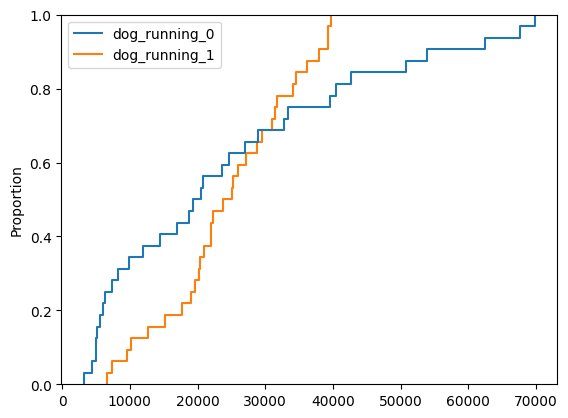

In [14]:
ks_test(images[0], images[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)




kstest for dog_running_1 and dog_running_2: 
KstestResult(statistic=0.21875, pvalue=0.43373609970146565, statistic_location=20058.0, statistic_sign=-1)


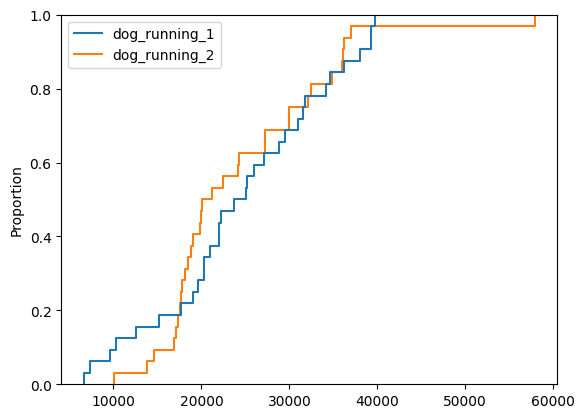

In [15]:
ks_test(images[1], images[2])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)




kstest for dog_running_0 and dog_running_2: 
KstestResult(statistic=0.34375, pvalue=0.04486227643337436, statistic_location=9907.0, statistic_sign=1)


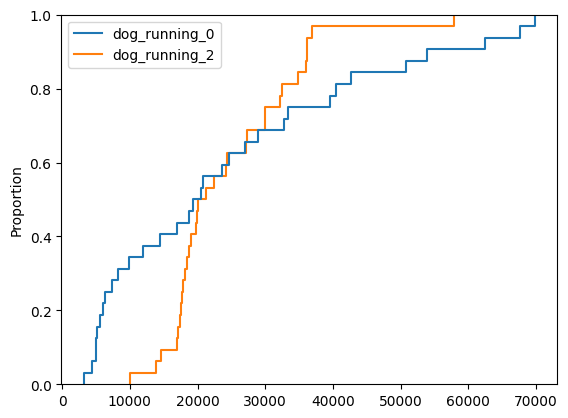

In [16]:
ks_test(images[0], images[2])

In [17]:
from scipy.stats import entropy
from scipy.stats import norm
#------- Simple equation to calculate KL-div -------
def kl_divergence(pk, qk):
    # arraynise
    pk = np.asarray(pk)
    # normalise
    pk = 1.0*pk / np.sum(pk, axis=0)
    qk = 1.0*qk / np.sum(qk, axis=0)
    # check to decide if we apply single or multi entropy
    return np.sum(entropy(pk, qk), axis=0)

#------- Simple equation to calculate JS-div -------
def js_divergence(p,q):
    m = (p+q)/2 # mean of them
    js = (kl_divergence(p, m) + kl_divergence(q, m))/2
    return js

In [18]:
def kl_and_js_divergence(image1, image2):
    p = image1["prob_dist"]
    q = image2["prob_dist"]
    print(f"KL({image1['name']}||{image2['name']}):" , str(kl_divergence(p, q)) )
    print(f"KL({image2['name']}||{image1['name']}):" , str(kl_divergence(q, p)) )
    print(f"JS({image1['name']}||{image2['name']}) or JS({image2['name']}||{image1['name']}):", js_divergence(p,q))
    print("\n\n")

In [19]:
kl_and_js_divergence(images[0], images[1])
kl_and_js_divergence(images[1], images[2])
kl_and_js_divergence(images[0], images[2])

KL(dog_running_0||dog_running_1): 0.10487742798002608
KL(dog_running_1||dog_running_0): 0.11961035664615051
JS(dog_running_0||dog_running_1) or JS(dog_running_1||dog_running_0): 0.02733903389497757



KL(dog_running_1||dog_running_2): 0.045900992686013636
KL(dog_running_2||dog_running_1): 0.04671482813854642
JS(dog_running_1||dog_running_2) or JS(dog_running_2||dog_running_1): 0.01144845912976111



KL(dog_running_0||dog_running_2): 0.20637612890334076
KL(dog_running_2||dog_running_0): 0.2088856275572093
JS(dog_running_0||dog_running_2) or JS(dog_running_2||dog_running_0): 0.05010171548845549



